# Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from google.colab.patches import cv2_imshow
from numpy.linalg import eigh
import os
import cv2

# Visualize image using opencv module(cv2) in python

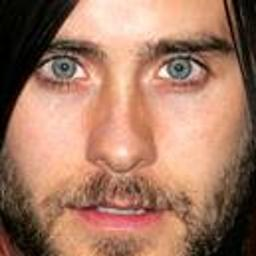

In [46]:
img=cv2.imread("/content/drive/My Drive/assg3_q1_dataset/003_029.jpg")
cv2_imshow(img)

# Reading images from dataset



*   Process images open cv module(cv2) in python
*   Convert all images to graysacle
*   Downscale image to 25% of original size







In [8]:
dir="/content/drive/My Drive/assg3_q1_dataset/"
grayall=[]
labels=[]

for filename in os.listdir(dir):
    img = cv2.imread(dir+filename)
    if img is None:
        continue
    labels.append(filename[2])
    img = cv2.resize(img, (0,0), fx=0.25, fy=0.25) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray=gray.flatten()
    grayall.append(gray)
grayall=np.array(grayall)
grayall=grayall.reshape(520,-1)
grayall.shape

(520, 4096)

# Visualize image after processing

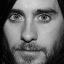

In [43]:
cv2_imshow(grayall[26].reshape(64,64))

# PCA function

In [0]:
def calc_pca(data,num_eigen):
	
	#Finding covariance
	mean = np.mean(data, axis = 0)
	mean_sub = data - mean
	cov = np.cov(mean_sub, rowvar = False)
    # print(cov.shape)
    # print(cov)

	#Finding eigen values
	eigens = np.linalg.eig(np.mat(cov))
	eigen_values=eigens[0]
	eigen_vectors=eigens[1]

	#Sorting eigen values and vectors
	eigen_values_sorted = np.argsort(-eigen_values)
	eigen_values_filtered = eigen_values_sorted[:num_eigen]
	eigen_vectors_filtered = eigen_vectors[:,eigen_values_filtered]
	
	#keeping specified eigen values
	selection=0
	for i in range(num_eigen):
		selection+=eigen_values[eigen_values_sorted[i]]
	variance_explained=selection/sum(eigen_values)

	#Reconstruct images	
	data_matrix = mean_sub * eigen_vectors_filtered	
	reconstructed = (data_matrix * eigen_vectors_filtered.T) + mean
	return (data_matrix.real, reconstructed.real, variance_explained.real)

# Plot for number of principal components v/s variance explained

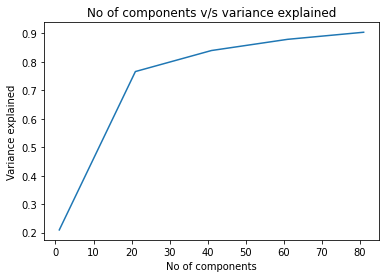

In [10]:
pc=[i for i in range(1,100,20)]
variance_exp=[]
for i in pc:
    img=calc_pca(grayall, i)
    variance_exp.append(img[2])
plt.plot(pc,variance_exp)
plt.xlabel("No of components")
plt.ylabel("Variance explained")
plt.title("No of components v/s variance explained")
plt.xlabel("No of components")
plt.show()

# Components required for less than 20% error
30 principal components required such that the reconstructed
images will have mean squared error less than 20% over all train images, or variance explained is more than 80%

In [12]:
img_after_pca = calc_pca(grayall, 30)
print("Variance explained using 30 components: ",img_after_pca[2])

Variance explained using 30 components:  0.8056691443232143


# Reconstructed image after PCA

## Keeping 30 components

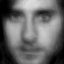

In [44]:
cv2_imshow(img_after_pca[1][26].reshape(64,64))

## Keeping 100 components

Variance explained using 100 components:  0.9203264752904512


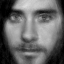

In [47]:
img_after_pca = calc_pca(grayall, 100)
print("Variance explained using 100 components: ",img_after_pca[2])
cv2_imshow(img_after_pca[1][26].reshape(64,64))

# 1D scatterplot

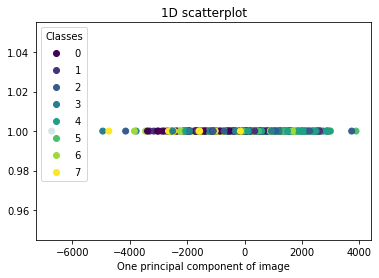

In [53]:
ans=calc_pca(grayall, 1)
img1d=ans[0].tolist()
img1d=[i[0] for i in img1d ]
col=[int(i) for i in labels]
y=np.ones((520))

scatter=plt.scatter(img1d,y,c=col)
plt.legend(*scatter.legend_elements(),loc="upper left",title="Classes")
plt.xlabel("One principal component of image")
plt.title("1D scatterplot")
plt.show()

# 2D scatterplot

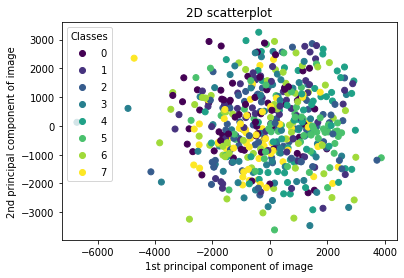

In [54]:
ans2=calc_pca(grayall, 2)
img2dx=ans2[0][:,0]
img2dx=img2dx.tolist()
img2dx=[i[0] for i in img2dx ]
img2dy=ans2[0][:,1]
img2dy=img2dy.tolist()
img2dy=[i[0] for i in img2dy ]
col=[int(i) for i in labels]
plt.legend(*scatter.legend_elements(),loc="upper left",title="Classes")
plt.xlabel("1st principal component of image")
plt.ylabel("2nd principal component of image")
plt.title("2D scatterplot")
plt.scatter(img2dx,img2dy,c=col)
plt.show()

# 3D scatterplot

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


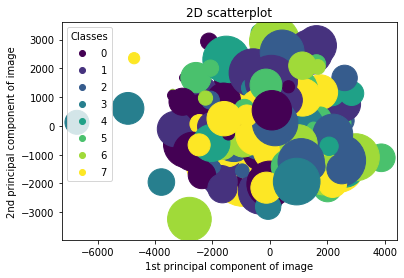

In [55]:
ans3=calc_pca(grayall, 3)

img3dx=ans3[0][:,0]
img3dx=img3dx.tolist()
img3dx=[i[0] for i in img3dx ]

img3dy=ans3[0][:,1]
img3dy=img3dy.tolist()
img3dy=[i[0] for i in img3dy ]

img3dz=ans3[0][:,2]
img3dz=img3dz.tolist()
img3dz=[i[0] for i in img3dz ]

col=[int(i) for i in labels]
plt.scatter(img3dx,img3dy,img3dz,c=col)

plt.legend(*scatter.legend_elements(),loc="upper left",title="Classes")
plt.xlabel("1st principal component of image")
plt.ylabel("2nd principal component of image")
plt.title("2D scatterplot")
plt.show()
